## Actividad 4.1 
María Matanzo Hermoso | A01737554

Laisha Puentes Angulo | A012736397

Marco Cornejo Cornejo | A01276411

Jorge Alberto Cortes Sánchez | A01736236

Eduardo Torres Naredo | A01734935

In [2351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

Se realiza limpieza de datos

In [2352]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

<Figure size 1500x800 with 0 Axes>

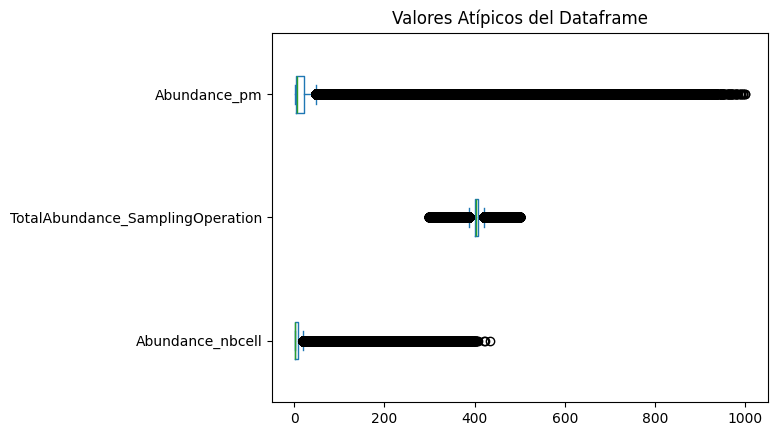

In [2353]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [2354]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64
Limite inferior permitido Abundance_nbcell                    -71.124054
TotalAbundance_SamplingOperation    374.808697
Abundance_pm                       -175.176372
dtype: float64


In [2355]:
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [2356]:
valores_nulos=data3.isnull().sum()
valores_nulos

Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [2357]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.median(),1))
data_clean

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [2358]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [2359]:
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1.0,412.0,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1.0,400.0,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1.0,403.0,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7.0,400.0,17.500000


Se realiza jerarquía en frecuencias (dataframe obtenido contenga únicamente columnas numéricas).

In [2360]:
datos_numericos = Datos_limpios.copy()

In [2361]:
taxon_name_mapping = {name: i+1 for i, name in enumerate(Datos_limpios['TaxonName'].unique())}
datos_numericos['TaxonName_num'] = datos_numericos['TaxonName'].map(taxon_name_mapping)

In [2362]:
taxon_code_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['TaxonCode'].unique())}
datos_numericos['TaxonCode_num'] = datos_numericos['TaxonCode'].map(taxon_code_mapping)

In [2363]:
sampling_ops_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['SamplingOperations_code'].unique())}
datos_numericos['SamplingOperations_code_num'] = datos_numericos['SamplingOperations_code'].map(sampling_ops_mapping)

In [2364]:
codesite_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['CodeSite_SamplingOperations'].unique())}
datos_numericos['CodeSite_SamplingOperations_num'] = datos_numericos['CodeSite_SamplingOperations'].map(codesite_mapping)

In [2365]:
columnas_numericas = ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm',
                     'TaxonName_num', 'TaxonCode_num', 'SamplingOperations_code_num', 
                     'CodeSite_SamplingOperations_num', 'Date_SamplingOperation']

Tabla_final = datos_numericos[columnas_numericas]

Tabla_final.head()

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation
0,8.0,420.0,19.047619,1,1,1,1,2012-09-10
1,1.0,404.0,2.475248,1,1,2,2,2010-07-28
2,1.0,400.0,2.500000,2,2,3,3,2007-08-08
3,2.0,400.0,5.000000,2,2,4,4,2009-08-03
4,1.0,400.0,2.500000,2,2,5,5,2012-07-26


In [2366]:
Tabla_final_num = Tabla_final

In [2367]:
Q1 = Tabla_final_num['TaxonName_num'].quantile(0.25)
Q2 = Tabla_final_num['TaxonName_num'].quantile(0.50)  
Q3 = Tabla_final_num['TaxonName_num'].quantile(0.75)

print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)

Q1: 352.0
Q2: 1196.0
Q3: 1656.0


In [2368]:
Tabla_final_num["TaxonName_num"]=Tabla_final_num["TaxonName_num"].apply(lambda x:1 if x>=352 else 0)
Tabla_final_num

C:\Users\maryk\AppData\Local\Temp\ipykernel_23908\2163951956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_num["TaxonName_num"]=Tabla_final_num["TaxonName_num"].apply(lambda x:1 if x>=352 else 0)


,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation
0,8.0,420.0,19.047619,0,1,1,1,2012-09-10
1,1.0,404.0,2.475248,0,1,2,2,2010-07-28
2,1.0,400.0,2.500000,0,2,3,3,2007-08-08
3,2.0,400.0,5.000000,0,2,4,4,2009-08-03
4,1.0,400.0,2.500000,0,2,5,5,2012-07-26
...,...,...,...,...,...,...,...,...
1643867,1.0,412.0,2.427184,1,2292,5474,2716,2013-08-06
1643868,1.0,400.0,2.500000,1,2292,38504,496,2011-08-04
1643869,1.0,403.0,2.481390,1,2292,7142,3347,2012-06-06
1643870,7.0,400.0,17.500000,1,2292,40590,3347,2022-08-31


In [2369]:
P25 = np.percentile(Tabla_final_num['TaxonCode_num'], 25)
P50 = np.percentile(Tabla_final_num['TaxonCode_num'], 50)
P75 = np.percentile(Tabla_final_num['TaxonCode_num'], 75)
P90 = np.percentile(Tabla_final_num['TaxonCode_num'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 352.0  P50: 1196.0  P75: 1656.0  P90: 2034.0


In [2370]:
Tabla_final_num["TaxonCode_num"]=Tabla_final_num["TaxonCode_num"].apply(lambda x:1 if x>=352 else 0)
Tabla_final_num

C:\Users\maryk\AppData\Local\Temp\ipykernel_23908\2817433607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_num["TaxonCode_num"]=Tabla_final_num["TaxonCode_num"].apply(lambda x:1 if x>=352 else 0)


,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation
0,8.0,420.0,19.047619,0,0,1,1,2012-09-10
1,1.0,404.0,2.475248,0,0,2,2,2010-07-28
2,1.0,400.0,2.500000,0,0,3,3,2007-08-08
3,2.0,400.0,5.000000,0,0,4,4,2009-08-03
4,1.0,400.0,2.500000,0,0,5,5,2012-07-26
...,...,...,...,...,...,...,...,...
1643867,1.0,412.0,2.427184,1,1,5474,2716,2013-08-06
1643868,1.0,400.0,2.500000,1,1,38504,496,2011-08-04
1643869,1.0,403.0,2.481390,1,1,7142,3347,2012-06-06
1643870,7.0,400.0,17.500000,1,1,40590,3347,2022-08-31


In [2371]:
P25 = np.percentile(Tabla_final_num['SamplingOperations_code_num'], 25)
P50 = np.percentile(Tabla_final_num['SamplingOperations_code_num'], 50)
P75 = np.percentile(Tabla_final_num['SamplingOperations_code_num'], 75)
P90 = np.percentile(Tabla_final_num['SamplingOperations_code_num'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 10699.0  P50: 21806.0  P75: 33679.0  P90: 42006.0


In [2372]:
Tabla_final_num["SamplingOperations_code_num"]=Tabla_final_num["SamplingOperations_code_num"].apply(lambda x:1 if x>=21806 else 0)
Tabla_final_num

C:\Users\maryk\AppData\Local\Temp\ipykernel_23908\1347684427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_num["SamplingOperations_code_num"]=Tabla_final_num["SamplingOperations_code_num"].apply(lambda x:1 if x>=21806 else 0)


,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation
0,8.0,420.0,19.047619,0,0,0,1,2012-09-10
1,1.0,404.0,2.475248,0,0,0,2,2010-07-28
2,1.0,400.0,2.500000,0,0,0,3,2007-08-08
3,2.0,400.0,5.000000,0,0,0,4,2009-08-03
4,1.0,400.0,2.500000,0,0,0,5,2012-07-26
...,...,...,...,...,...,...,...,...
1643867,1.0,412.0,2.427184,1,1,0,2716,2013-08-06
1643868,1.0,400.0,2.500000,1,1,1,496,2011-08-04
1643869,1.0,403.0,2.481390,1,1,0,3347,2012-06-06
1643870,7.0,400.0,17.500000,1,1,1,3347,2022-08-31


In [2373]:
P25 = np.percentile(Tabla_final_num['CodeSite_SamplingOperations_num'], 25)
P50 = np.percentile(Tabla_final_num['CodeSite_SamplingOperations_num'], 50)
P75 = np.percentile(Tabla_final_num['CodeSite_SamplingOperations_num'], 75)
P90 = np.percentile(Tabla_final_num['CodeSite_SamplingOperations_num'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 1351.0  P50: 2896.0  P75: 4697.0  P90: 6112.0


In [2374]:
Tabla_final_num["CodeSite_SamplingOperations_num"]=Tabla_final_num["CodeSite_SamplingOperations_num"].apply(lambda x:1 if x>=2896 else 0)
Tabla_final_num

C:\Users\maryk\AppData\Local\Temp\ipykernel_23908\4011988985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_num["CodeSite_SamplingOperations_num"]=Tabla_final_num["CodeSite_SamplingOperations_num"].apply(lambda x:1 if x>=2896 else 0)


,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation
0,8.0,420.0,19.047619,0,0,0,0,2012-09-10
1,1.0,404.0,2.475248,0,0,0,0,2010-07-28
2,1.0,400.0,2.500000,0,0,0,0,2007-08-08
3,2.0,400.0,5.000000,0,0,0,0,2009-08-03
4,1.0,400.0,2.500000,0,0,0,0,2012-07-26
...,...,...,...,...,...,...,...,...
1643867,1.0,412.0,2.427184,1,1,0,0,2013-08-06
1643868,1.0,400.0,2.500000,1,1,1,0,2011-08-04
1643869,1.0,403.0,2.481390,1,1,0,1,2012-06-06
1643870,7.0,400.0,17.500000,1,1,1,1,2022-08-31


In [2375]:
Tabla_final2=Tabla_final_num

In [2376]:
Tabla_final2 = Tabla_final2.sort_values(by='Date_SamplingOperation', ascending=False)
Tabla_final2 = Tabla_final2.reset_index(drop=True)
indice_medio = len(Tabla_final2) // 2
fecha_central = Tabla_final2.loc[indice_medio, 'Date_SamplingOperation']
print("Fecha de en medio:", fecha_central)

Fecha de en medio: 2016-08-31


In [2377]:
Tabla_final_num["Date_SamplingOperation"] = pd.to_datetime(Tabla_final_num["Date_SamplingOperation"])

fecha_limite = pd.to_datetime("2016-08-31")

Tabla_final_num["Date_SamplingOperation"] = Tabla_final_num["Date_SamplingOperation"].apply(
    lambda x: 1 if x >= fecha_limite else 0
)
Tabla_final_num

C:\Users\maryk\AppData\Local\Temp\ipykernel_23908\1685551970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_num["Date_SamplingOperation"] = pd.to_datetime(Tabla_final_num["Date_SamplingOperation"])
C:\Users\maryk\AppData\Local\Temp\ipykernel_23908\1685551970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_num["Date_SamplingOperation"] = Tabla_final_num["Date_SamplingOperation"].apply(


,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation
0,8.0,420.0,19.047619,0,0,0,0,0
1,1.0,404.0,2.475248,0,0,0,0,0
2,1.0,400.0,2.500000,0,0,0,0,0
3,2.0,400.0,5.000000,0,0,0,0,0
4,1.0,400.0,2.500000,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1643867,1.0,412.0,2.427184,1,1,0,0,0
1643868,1.0,400.0,2.500000,1,1,1,0,0
1643869,1.0,403.0,2.481390,1,1,0,1,0
1643870,7.0,400.0,17.500000,1,1,1,1,1


## Regresion logistica 1

In [2378]:
Vars_Indep= Tabla_final[['Abundance_nbcell', 'Abundance_pm']]
Var_Dep= Tabla_final_num['TaxonName_num']
X= Vars_Indep
y= Var_Dep

In [2379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2380]:
y_pred = algoritmo.predict(X_test) 
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(493162,))

In [2381]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  5893 116831]
 [  5034 365404]]


In [2382]:
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.7577301523116323


In [2383]:
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.539306305481834


In [2384]:
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7528905309005965


In [2385]:
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.9864106814095747


In [2386]:
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.04801831752550438


In [2387]:
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.8570788567246764


In [2388]:
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.08818489947699605


## Regresion logisitica 2

In [2389]:
Vars_Indep= Tabla_final[['Abundance_nbcell', 'Abundance_pm']]
Var_Dep= Tabla_final_num['TaxonCode_num']
X= Vars_Indep
y= Var_Dep

In [2390]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state =None)
escalar1 = StandardScaler()
X_train1 = escalar1.fit_transform(X_train1)
X_test1 = escalar1.transform(X_test1)
algoritmo1 = LogisticRegression()
algoritmo1.fit(X_train1, y_train1)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2391]:
y_pred1 = algoritmo1.predict(X_test1) 
y_pred1

array([1, 1, 1, ..., 1, 1, 1], shape=(493162,))

In [2392]:
matriz = confusion_matrix(y_test1, y_pred1)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  5925 117422]
 [  5120 364695]]


In [2393]:
precision = precision_score(y_test1, y_pred1, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.7564450123102898


In [2394]:
precision = precision_score(y_test1, y_pred1, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.536441828881847


In [2395]:
exactitud = accuracy_score(y_test1, y_pred1)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7515177568425792


In [2396]:
sensibilidad = recall_score(y_test1, y_pred1, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.9861552397820532


In [2397]:
sensibilidad = recall_score(y_test1, y_pred1, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.04803521771911761


In [2398]:
puntajef1 = f1_score(y_test1, y_pred1, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8561598813050807


In [2399]:
puntajef1 = f1_score(y_test1, y_pred1, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.08817489136258111


## Regresion logistica 3

In [2400]:
Vars_Indep1= Tabla_final[['CodeSite_SamplingOperations_num', 'Date_SamplingOperation']]
Var_Dep1= Tabla_final_num['SamplingOperations_code_num']
X1= Vars_Indep1
y1= Var_Dep1

In [2401]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.3, random_state =None)
escalar2 = StandardScaler()
X_train2 = escalar2.fit_transform(X_train2)
X_test2 = escalar2.transform(X_test2)
algoritmo2 = LogisticRegression()
algoritmo2.fit(X_train2, y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2402]:
y_pred2 = algoritmo2.predict(X_test2) 
y_pred2

array([1, 0, 0, ..., 0, 1, 0], shape=(493162,))

In [2403]:
matriz = confusion_matrix(y_test2, y_pred2)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[150664  95492]
 [ 96132 150874]]


In [2404]:
precision = precision_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.6123978146335127


In [2405]:
precision = precision_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.610479910533396


In [2406]:
exactitud = accuracy_score(y_test2, y_pred2)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6114380264497264


In [2407]:
sensibilidad = recall_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.6108110734152207


In [2408]:
sensibilidad = recall_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.6120671444124864


In [2409]:
puntajef1 = f1_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.6116034148674834


In [2410]:
puntajef1 = f1_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Puntaje F1 del  label 0:')
print(puntajef1)

Puntaje F1 del  label 0:
0.611272497119395


## Regresion lineal 4

In [2411]:
Vars_Indep2= Tabla_final[['SamplingOperations_code_num', 'Abundance_pm', 'TaxonName_num']]
Var_Dep2= Tabla_final_num['CodeSite_SamplingOperations_num']
X2= Vars_Indep2
y2= Var_Dep2

In [2412]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.3, random_state =None)
escalar3 = StandardScaler()
X_train3 = escalar3.fit_transform(X_train3)
X_test3 = escalar3.transform(X_test3)
algoritmo3 = LogisticRegression()
algoritmo3.fit(X_train3, y_train3)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2413]:
y_pred3 = algoritmo3.predict(X_test3) 
y_pred3

array([0, 0, 1, ..., 1, 1, 0], shape=(493162,))

In [2414]:
matriz = confusion_matrix(y_test3, y_pred3)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[150174  96159]
 [ 96166 150663]]


In [2415]:
precision = precision_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.610411551644505


In [2416]:
precision = precision_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.6096208492327677


In [2417]:
exactitud = accuracy_score(y_test3, y_pred3)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6100165868416464


In [2418]:
sensibilidad = recall_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.6096381727174192


In [2419]:
sensibilidad = recall_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.6103942405470995


In [2420]:
puntajef1 = f1_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.610402895973066


In [2421]:
puntajef1 = f1_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.6096295108520255


## Regresion logisitca 5

In [2422]:
Vars_Indep3= Tabla_final[['TotalAbundance_SamplingOperation','Abundance_pm']]
Var_Dep3= Tabla_final_num['Date_SamplingOperation']
X3= Vars_Indep3
y3= Var_Dep3

In [2423]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size=0.3, random_state =None)
escalar4 = StandardScaler()
X_train4 = escalar4.fit_transform(X_train4)
X_test4 = escalar4.transform(X_test4)
algoritmo4 = LogisticRegression()
algoritmo4.fit(X_train4, y_train4)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2424]:
y_pred4 = algoritmo4.predict(X_test4) 
y_pred4

array([0, 0, 1, ..., 0, 1, 0], shape=(493162,))

In [2425]:
matriz = confusion_matrix(y_test4, y_pred4)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[141515 104532]
 [126404 120711]]


In [2426]:
precision = precision_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.5359145456240594


In [2427]:
precision = precision_score(y_test4, y_pred4, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.5282006875212284


In [2428]:
exactitud = accuracy_score(y_test4, y_pred4)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5317238554470944


In [2429]:
sensibilidad = recall_score(y_test4, y_pred4, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.5751543404308933


In [2430]:
sensibilidad = recall_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.4884810715658701


In [2431]:
puntajef1 = f1_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.5110996320587351


In [2432]:
puntajef1 = f1_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.5110996320587351


In [2433]:
# Calcular matrices de confusión para todos los modelos
matriz_1 = confusion_matrix(y_test, y_pred)
matriz_2 = confusion_matrix(y_test1, y_pred1)
matriz_3 = confusion_matrix(y_test2, y_pred2)
matriz_4 = confusion_matrix(y_test3, y_pred3)
matriz_5 = confusion_matrix(y_test4, y_pred4)

# Calcular métricas para el modelo 1
True_Positives_1 = matriz_1[0, 0]
True_Negatives_1 = matriz_1[1, 1]
False_positives_1 = matriz_1[0, 1]
False_Negatives_1 = matriz_1[1, 0]

# Calcular métricas para el modelo 2
True_Positives_2 = matriz_2[0, 0]
True_Negatives_2 = matriz_2[1, 1]
False_positives_2 = matriz_2[0, 1]
False_Negatives_2 = matriz_2[1, 0]

# Calcular métricas para el modelo 3
True_Positives_3 = matriz_3[0, 0]
True_Negatives_3 = matriz_3[1, 1]
False_positives_3 = matriz_3[0, 1]
False_Negatives_3 = matriz_3[1, 0]

# Calcular métricas para el modelo 4
True_Positives_4 = matriz_4[0, 0]
True_Negatives_4 = matriz_4[1, 1]
False_positives_4 = matriz_4[0, 1]
False_Negatives_4 = matriz_4[1, 0]

# Calcular métricas para el modelo 5
True_Positives_5 = matriz_5[0, 0]
True_Negatives_5 = matriz_5[1, 1]
False_positives_5 = matriz_5[0, 1]
False_Negatives_5 = matriz_5[1, 0]

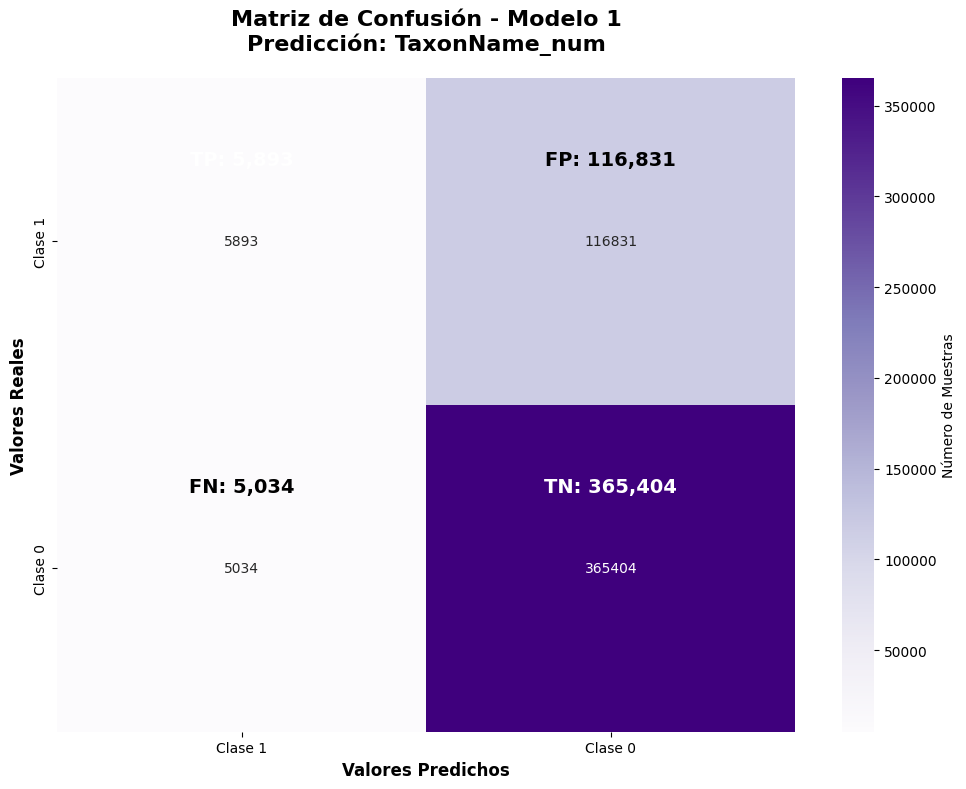

In [2434]:
# MODELO 1: TaxonName_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_1, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_1:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_1:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_1:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_1:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 1\nPredicción: TaxonName_num', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

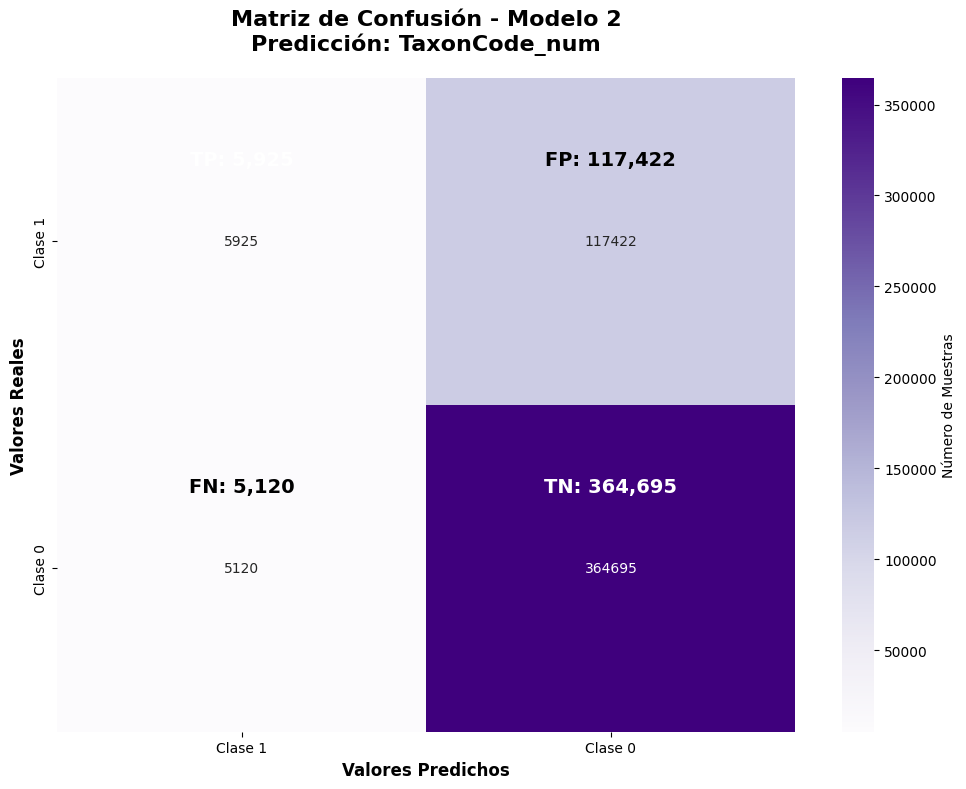

In [2435]:
# MODELO 2: TaxonCode_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_2, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 2\nPredicción: TaxonCode_num', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

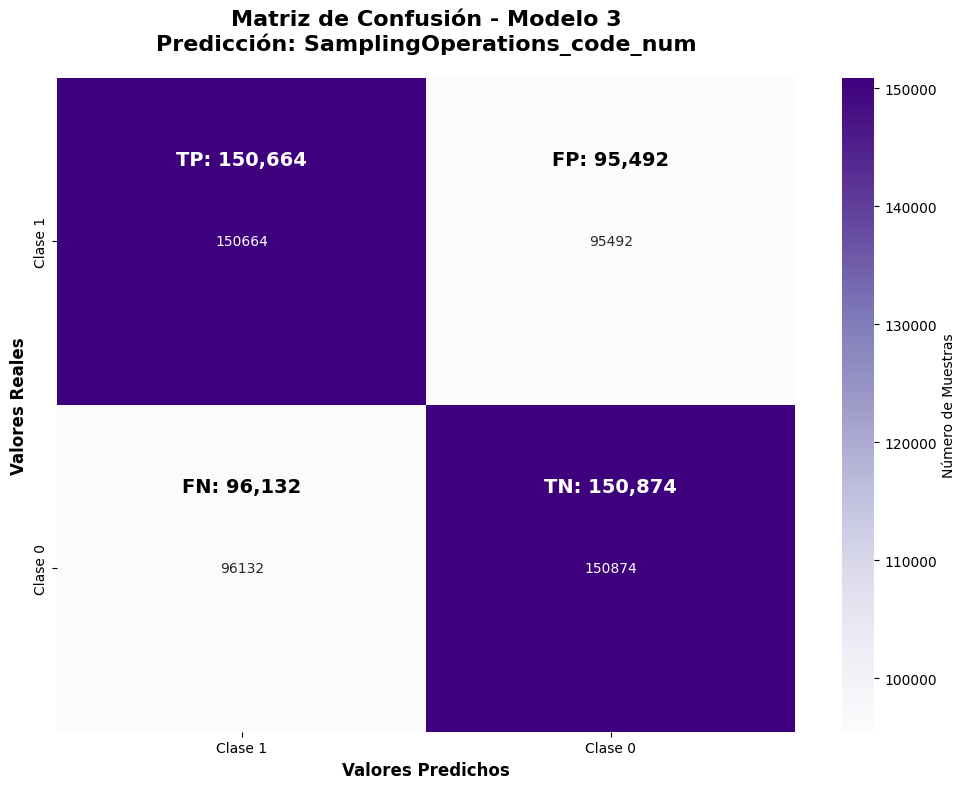

In [2436]:
# MODELO 3: SamplingOperations_code_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_3, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 3\nPredicción: SamplingOperations_code_num', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

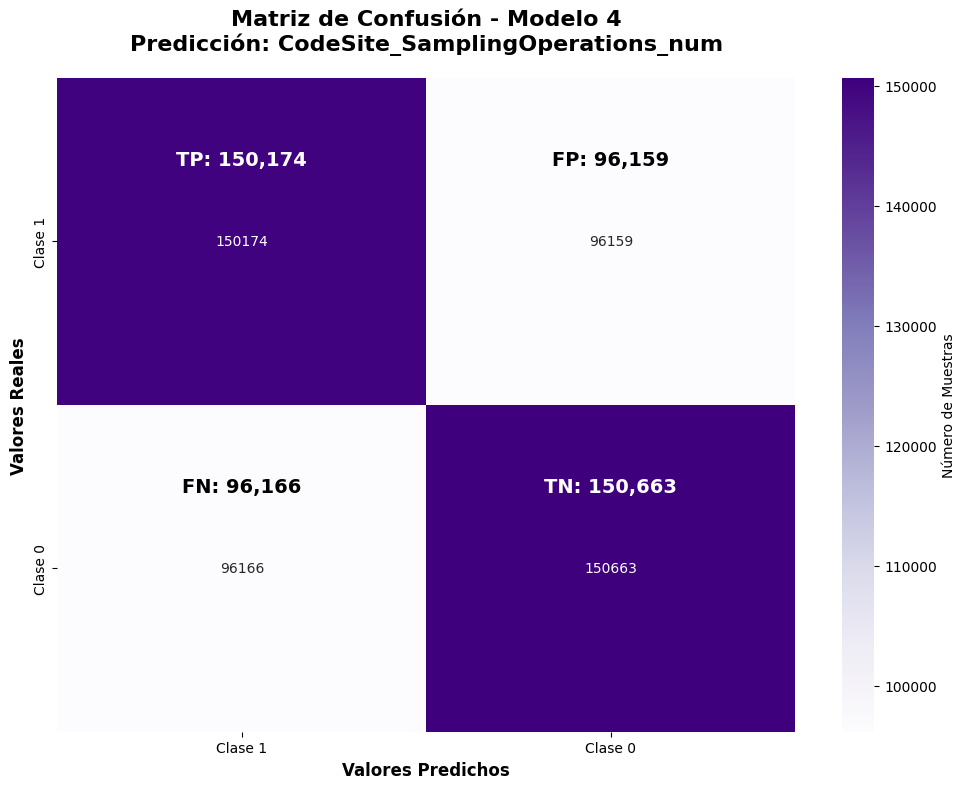

In [2437]:
# MODELO 4: CodeSite_SamplingOperations_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_4, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_4:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_4:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_4:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_4:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 4\nPredicción: CodeSite_SamplingOperations_num', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

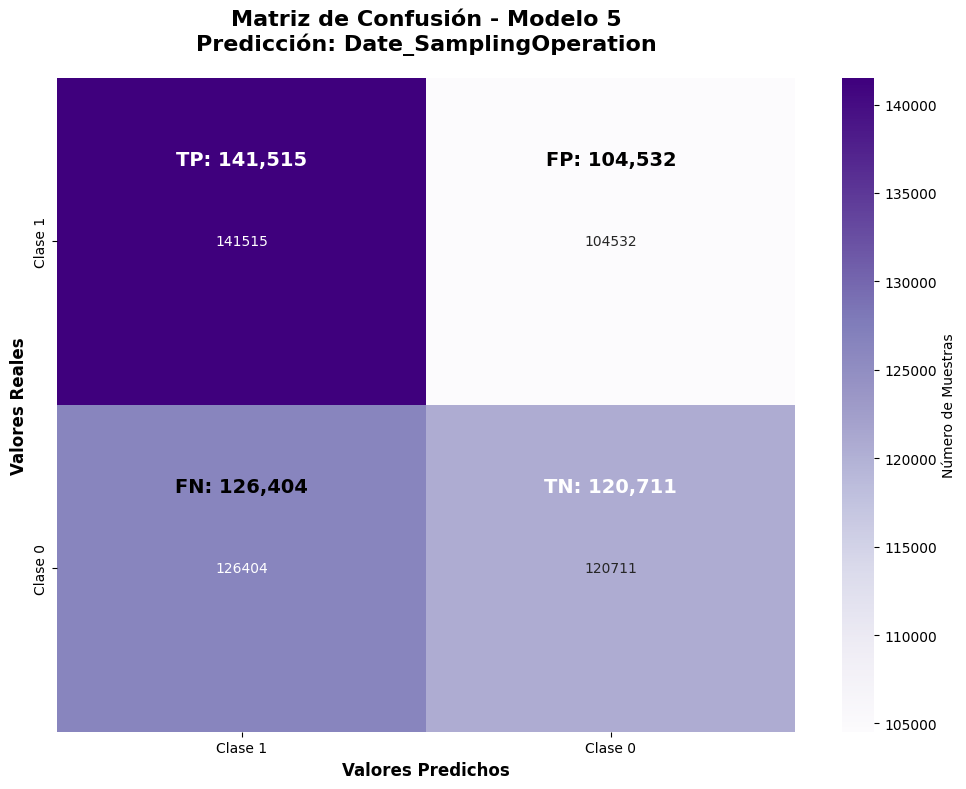

In [2438]:
# MODELO 5: Date_SamplingOperation
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_5, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_5:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_5:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_5:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_5:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 5\nPredicción: Date_SamplingOperation', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()